## Introduction to Artificial Neuron

This Notebook is for education purpose where I program a simple artificial neuron and

In [56]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from utilities import *

Generating and visualisation of random dataset

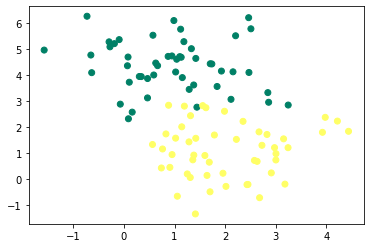

In [57]:
X,y = make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y = y.reshape(y.shape[0],1)
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.show()

Defining functions.

In [58]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

In [59]:
def model(X,W,b):
    Z = X.dot(W) + b
    A = 1/(1+np.exp(-Z))
    return A

In [60]:
'''
def log_loss(A,y):
    m = len(y)
    loss = 1/m * np.sum(-y*np.log(A)-(1-y)*np.log(1-A))
    return loss
'''

'\ndef log_loss(A,y):\n    m = len(y)\n    loss = 1/m * np.sum(-y*np.log(A)-(1-y)*np.log(1-A))\n    return loss\n'

In [61]:
def gradients(A,X,y):
    #dL/dw
    dw = 1/len(y)*np.dot(X.T,A-y)
    #dL/db
    db = 1/len(y)*np.sum(A-y)
    return (dw,db)

In [62]:
def update(dw,db,W,b,learning_rate):
    W = W -learning_rate*dw
    b = b -learning_rate*db
    return (W,b)

In [63]:
def predict(X,w,b):
    A = model(X,w,b)
    return A>= 0.5

Creating the model of AN

In [64]:
def artificial_neuron(X,y,learning_rate=0.1,n_iter=100):
    # Initialisation
    W,b = initialisation(X)
    Loss = []
    #Learning
    for i in range(n_iter):
        A = model(X,W,b)
        Loss.append(log_loss(y,A))
        dw,db = gradients(A,X,y)
        W,b = update(dw,db,W,b,learning_rate)
        
    y_pred = predict(X,W,b)
    print('Accuracy score is :',accuracy_score(y,y_pred))
    plt.plot(Loss)
    plt.show
    
    return W,b    

Accuracy score is : 0.93


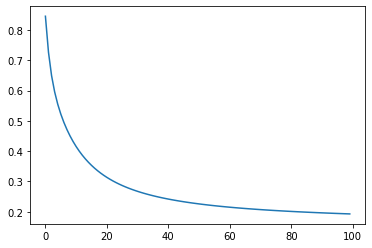

In [65]:
W_final,b_final = artificial_neuron(X,y,learning_rate=0.1,n_iter=100)

In [66]:
model_final = X.dot(W_final) + b_final

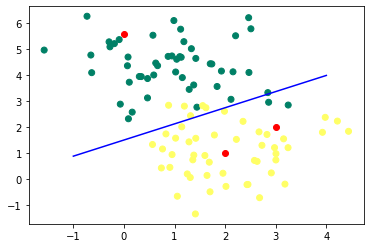

array([[ True],
       [ True],
       [False]])

In [67]:
new_plants = np.array(([3,2],[2,1],[0,5.58]))
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.scatter(new_plants[:,0],new_plants[:,1],c='r')
border_func = (-b_final -np.linspace(-1,4,100)*W_final[0])/W_final[1]
plt.plot(np.linspace(-1,4,100),border_func,c='b')
plt.show()
predict(new_plants,W_final,b_final)

## Exercice : Cat vs Dogs

In [84]:
X_train,y_train,X_test,y_test = load_data()

[[164 174 163 ... 144 131 134]
 [162 174 182 ... 143 144 128]
 [158 169 187 ... 158 143 151]
 ...
 [175 168 166 ...  91 176 173]
 [167 166 166 ...  45 184 124]
 [176 172 168 ...  87 180  39]]


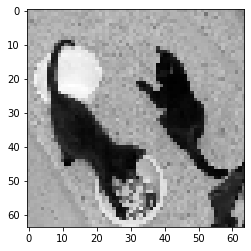

In [70]:
print(X_train[0])
plt.imshow(X_train[0],cmap='gray')

/Users/HatimHEBBOUL/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


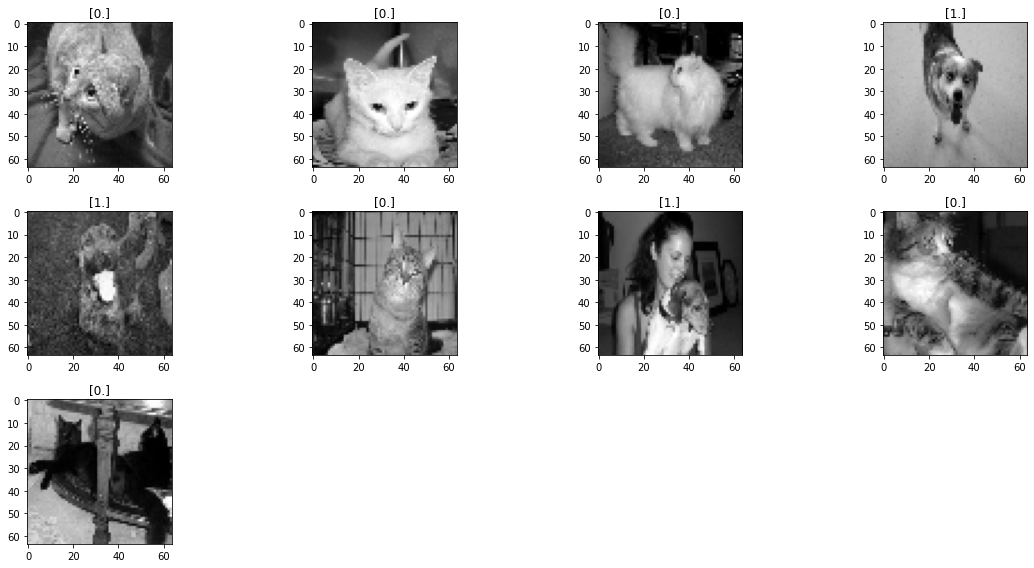

In [71]:
plt.figure(figsize=(16,8))
for i in range(1,10):
    plt.subplot(3,4,i)
    plt.imshow(X_train[i],cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

### STEP 1 : Normalizing the train set and test set.

In [85]:
X_train , X_test = X_train/255,X_test/255

### STEP 2 : Flatten the variables from 64x64 to 4096 var

In [86]:
X_train_reshaped = np.array([img.flatten() for img in X_train])
X_test_reshaped = np.array([img.flatten() for img in X_test])

Accuracy score is : 0.546


(array([[-1.11113926],
        [ 0.01512215],
        [-1.91670229],
        ...,
        [-0.93017888],
        [-0.114459  ],
        [-1.72099416]]),
 array([-2.53999376]))

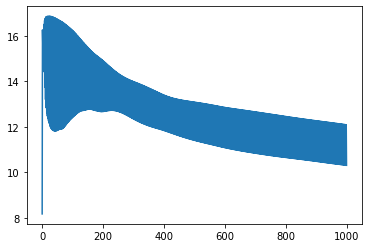

In [88]:
artificial_neuron(X_train_reshaped,y_train,learning_rate=0.2,n_iter=1000)